In [1]:
from bs4 import BeautifulSoup as bs
import requests

r = requests.get('https://google.com')
html = r.text
# print(html)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Ws1T6_jANZyfuKbpHid5TA">(function(){window.google={kEI:'U-GFYuUdhJOYBe-GpLAO',kEXPI:'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4013,1123753,1197788,613,380090,16114,28684,17572,4859,1361,9291,3020,17588,4020,978,13228,3847,3599,7023,22741,2370,2711,1593,1279,2742,149,1103,840,6297,109,4011,2023,1733,43,521,14670,3227,2845,7,17450,16320,1850,2615,13142,3,576,6460,148,12289,1686,4,1528,2304,6463,576,20309,4764,2658,4164,3193,13658,21223,651,5149,2557,4094,4052,3,3541,1,14262,27895,2,14019,1931,12185,11623,5679,1020,2379,2721,18260,2,6,7755,4568,6255,6720,16701,830,422,4606,2,6,1221,12137,2830,1539,2794,19,4998,1072,1395,445,2,2,1,14776,9414,436,153,1416,1,436,8155,6582,637,162,1401,1047,595,11637,7341

In [2]:
r = requests.get('https://google.com')
html = r.content 
#웹페이지의 content를 유니코드 형태가 아니라 bytes 형태로 얻기 위해서는 r.text가 아닌 r.content를 사용.
# print(html)

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="cqXyohbtqT8BkJWrkQqg2Q">(function(){window.google={kEI:\'ruGFYrCyEpSar7wPm8CVuA0\',kEXPI:\'0,1302536,56873,6059,206,4804,925,1391,383,246,5,1354,4013,1123753,1197782,619,380089,16115,17444,11240,17572,4858,1362,9290,3025,17584,4020,978,13228,3847,10622,22742,2854,3819,1279,2742,149,1103,840,2196,4101,108,4012,2023,1777,520,14670,3227,2845,7,17450,16320,4465,13142,3,576,4385,2074,149,13975,4,1528,2304,6463,576,20309,4764,2658,7357,13658,4437,16786,5818,2539,4094,4052,3,3541,1,42154,2,14022,1648,283,12185,11623,5679,1020,2381,2718,18297,2,6,7719,4568,6252,6729,16695,830,422,5835,12137,2830,1555,2778,19,6070,1395,445,2,2,1,1385,5575,10352,7467,1416,1,436,8155,6582,799,13,1388,1641,859,10779,7341,379,2,2836,1

In [4]:
import requests

r = requests.get('https://google.com')
html = r.content

print(r.status_code) #status_code는 정상일 경우 200, 페이지가 발견되지 않을 경우 404
print(r.headers['Content-Type'])
print(r.encoding) 
# encoding 방식은 ISO-8859-1이고, 요청에 대한 응답이 정상적으로 이루어졌음을 알 수 있음.
print(r.ok)
# (status_code가 200 보다 작거나 같은 경우 True, 그렇지 않은 경우 False)

200
text/html; charset=ISO-8859-1
ISO-8859-1
True


In [5]:
r.encoding = 'utf-8' 
#만약 인코딩 방식이 달라서 한글이 제대로 표시되지 않으면 위와 같이 인코딩 방식을 변경.

In [88]:
import requests
from bs4 import BeautifulSoup

url = 'https://google.com/'

r = requests.get(url)
html = r.content
soup = BeautifulSoup(html, 'html.parser')

# print(soup.head.prettify()) # print(soup.prettify())

<head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
 <title>
  Google
 </title>
 <script nonce="yHoSo868AY8L9ARewjSqXQ">
  (function(){window.google={kEI:'QxSGYsGuEovv-QaRmIyACQ',kEXPI:'0,1302536,56873,6058,207,2415,2389,2316,383,246,5,1354,4013,1123753,1197777,624,380090,16108,17450,11240,17572,4859,1361,9291,3024,4749,12835,4020,978,13228,3847,10622,22741,5081,885,708,1279,2742,149,1103,840,2197,4100,3514,606,2023,1777,520,14670,3227,2845,7,17450,7539,563,8218,1851,2614,3901,9241,3,346,230,4385,2075,148,13975,4,1528,655,1649,7039,20309,4764,2658,7357,11443,2215,21223,5797,2560,4094,4052,3,3541,1,42154,2,14022,1931,12185,11623,5679,1020,2381,2719,18278,2,6,5564,2172,4569,6258,2954,20464,830,422,4606,2,6,1221,12137,2830,1555,2778,19,3026,3045,1394,445,2,2,1,6959,17820,1416,1,436,8155,6582,799,1401,78,969,595,858,7872,2907,7341,2650,568,203,2,6,12955,773,262,846,108,

In [146]:
soup.name

'[document]'

In [68]:
# print(soup.body.prettify()) # body 부분만 프린트

<body bgcolor="#fff">
 <script nonce="Y5dE1z9CnQtQggoCkGrgug">
  (function(){var src='/images/nav_logo229.png';var iesg=false;document.body.onload = function(){window.n && window.n();if (document.images){new Image().src=src;}
if (!iesg){document.f&&document.f.q.focus();document.gbqf&&document.gbqf.q.focus();}
}
})();
 </script>
 <div id="mngb">
  <div id="gbar">
   <nobr>
    <b class="gb1">
     검색
    </b>
    <a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">
     이미지
    </a>
    <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">
     지도
    </a>
    <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">
     Play
    </a>
    <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">
     YouTube
    </a>
    <a class="gb1" href="https://news.google.com/?tab=wn">
     뉴스
    </a>
    <a class="gb1" href="https://mail.google.com/mail/?tab=wm">
     Gmail
    </a>
    <a class="gb1" href="https://drive.google.com/?tab=wo">
    

In [87]:
soup.body.select('#gbar a')

[<a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a>,
 <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a>,
 <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a>,
 <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a>]

```
select(), select_one()설명
태그이름 : 태그이름으로 찾음
.클래스이름' : 클래스이름(class='class_name" ==> .class_name으로 찾음
#아이디이름' : 아이디이름(id='id_name' ==> #id_name)으로 찾음 (아이디는 연속X)
상위태그이름>자식태그>자식태그' : 부모 자식간의 태그 조회' >' 로 구분
   soup.select("div.section_cell>div>h3>strong")
상위태그이름 자손태그' : 부모 자손간의 태그 조회 #띄어쓰기(공백) 로 구분 #자식을 건너 띈다.
   soup.select("div.section_cell strong")
[속성]' : 태그 안의 속성을 찾음
   soup.select("#id_name div.list_type a")[0]['href']
   soup.select("#id_name img")[0]['src']
태그이름.클래스이름' : 해당태그의 클래스이름을 찾음
#id_name > 태그이름.클래스이름 : 아이이디 이름으로 찾고 자식태그와 클래스이름으로 찾음
   soup.select("#id_name div.tit_area strong")
   soup.select("#id_name div.list_type a>span.txt")[0].text
   
   
find, find_all()
   soup.find_all("a", class_='link_news') # == soup.select('a.link_news')
   soup.find("a", id='link_news') # == soup.select('#link_news')

```

<!DOCTYPE doctype html>
<html lang="ko">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="text/javascript" http-equiv="Content-Script-Type"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="No-Cache" http-equiv="Pragma"/>
  <meta content="now" http-equiv="Expires"/>
  <link href="https://shopv.pstatic.net/web/cnsv/p/im/home/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://ssl.pstatic.net/static.checkout/cnsv/m/icon/newshopping/v2/iOS6_57X57_iphone3.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="https://ssl.pstatic.net/static.checkout/cnsv/m/icon/newshopping/v2/iOS6_57X57_iphone3.png" rel="apple-touch-icon-precomposed" sizes="57x57"/>
  <meta content="ko_KR" property="og:locale"/>
  <meta content="website" property="og:type"/>
  <meta content="네이버쇼핑" property="og:locale"/>
  <meta content="온/오프라인 상품 탐색과 쇼핑정보, 가격비교, 제품
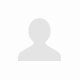
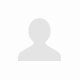

In [56]:
print(html_keep.prettify())

In [59]:
url1=  "https://www.theguardian.com/world/2017/jun/26/angela-merkel-and-donald-trump-head-for-clash-at-g20-summit"

In [64]:
from bs4 import BeautifulSoup as bs
import requests

In [104]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_greenhouse_gas_emissions'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [105]:
soup = BeautifulSoup(req.text,"html.parser")
# print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by greenhouse gas emissions - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"34191e4e-2026-491e-8460-c7ae06472bc4","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_greenhouse_gas_emissions","wgTitle":"List of countries by greenhouse gas emissions","wgCurRevisionId":1076518076,"wgRevisionId":1076518076,"wgArticleId":27970905,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Shor

In [106]:
soup.body.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading">List of countries by greenhouse gas emissions</h1>

In [115]:
rows = soup.find_all('tr')  # .find('td')
cols = [t.text.rstrip() for t in rows[1].find_all('th')]

In [119]:
cols

['State',
 'Production-based emissions (MtCO2e) 2018 (CAIT)[1]',
 'Production-based emissions INCLUDING land-use, land-use change and forestry (reported to UNFCCC)MtCO2e 2018[5]',
 'Production-based emissions excluding land-use, land-use change and forestry(World Resources Institute)MtCO2e 2016[6]',
 'Consumption-based emissions(Global Carbon Project)MtCO2e 2016[7]']

In [120]:
mimage = soup.find_all("td", class_='mbox-image') # == soup.select('td.mbox-image')
print(mimage)

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/></div></td>]


In [145]:
mimage = soup.find_all("td", attrs = {'class': 'mbox-image'})
print(mimage)

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/></div></td>]


In [124]:
mimage = soup.select('td.mbox-image')
print(mimage)

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/></div></td>]


In [125]:
soup.find("span", id='See_also') # == soup.find(id='See_also') == soup.select_one('#See_also')

<span class="mw-headline" id="See_also">See also</span>

In [131]:
soup.select_one('#See_also') # id => #

<span class="mw-headline" id="See_also">See also</span>

In [129]:
soup.find_all(id='See_also')

[<span class="mw-headline" id="See_also">See also</span>]

In [134]:
find1 = soup.find_all("td", 'mbox-image')
find1

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/></div></td>]

In [142]:
find2 = find1[0].find('div').find('img') # 한개씩 한단계씩 찾아감. == find2 = find1[0].select('img')

In [138]:
find2 = find1[0].select('img')

In [143]:
find2

<img alt="Ambox current red.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x" width="42"/>

In [149]:
find2.name

'img'

In [150]:
find2.attrs

{'alt': 'Ambox current red.svg',
 'src': '//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png',
 'decoding': 'async',
 'width': '42',
 'height': '34',
 'srcset': '//upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/63px-Ambox_current_red.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/84px-Ambox_current_red.svg.png 2x',
 'data-file-width': '360',
 'data-file-height': '290'}

In [151]:
find2.text

''